In [10]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connct = psycopg2.connect('dbname=WhiskyAdvocate user= postgres password = 23Tiafdtd32 host = 127.0.0.1 port=5432')

In [11]:
#Query the database to recover the needed data for unsupervised learning operations

ds_query = ''' SELECT * FROM features_rev_prop'''

ml_df_full = pd.read_sql(ds_query, connct)

ml_df_full.head()

,whiskey_id,fruit_prop,wood_prop,spicy_prop,sweet_prop,maillard_prop,smoke_prop
0,0,0.400000,0.200000,0.400000,0.000000,0.000000,0.0
1,1,0.400000,0.000000,0.000000,0.200000,0.400000,0.0
2,2,0.166667,0.333333,0.166667,0.166667,0.166667,0.0
3,3,0.250000,0.000000,0.000000,0.750000,0.000000,0.0
4,4,0.333333,0.000000,0.000000,0.500000,0.166667,0.0


In [12]:
#close the connection
connct.close()

In [13]:
#git rid of whiskey_id

ml_df = ml_df_full.drop(['whiskey_id'], axis = 1)

#check for missing values
ml_df.isnull().sum()

fruit_prop       0
wood_prop        0
spicy_prop       0
sweet_prop       0
maillard_prop    0
smoke_prop       0
dtype: int64

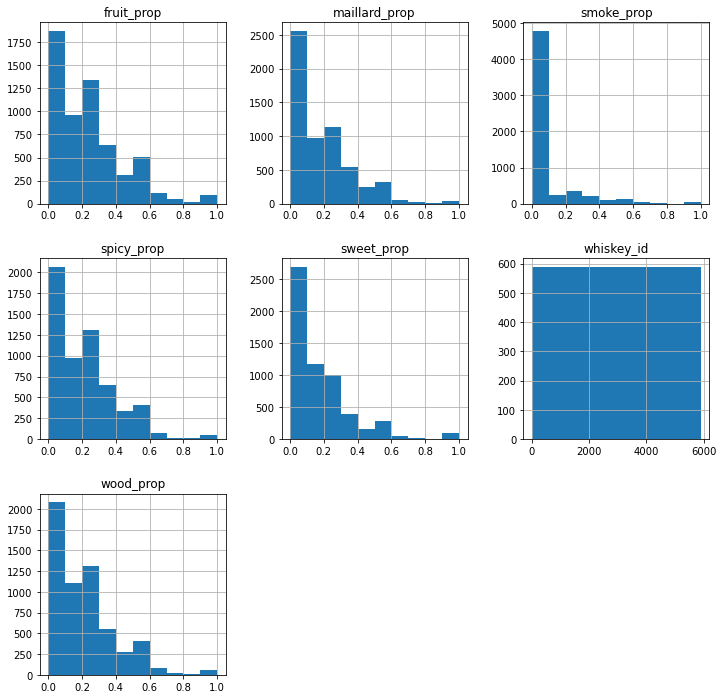

In [14]:
#A few visualizations of the new features

ml_df_full.hist(figsize = (12, 12))

plt.show()

# Visualize separation in data using t-SNE

In [15]:
#import libraries for tSNE and min/max scaler to make sure dimensions have equal 
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [16]:
#change the name to fit the script (data already scaled in processing

ml_scale = ml_df


In [17]:
# TSNE the scaled data using default hyperparameters and try to visualize it

tsne1 = TSNE(random_state=42)

ws_tsne1 = tsne1.fit_transform(ml_scale)

ws_tsne1

array([[  9.45361  ,  68.94664  ],
       [ 16.188341 ,   5.0238905],
       [  9.309708 , -14.471951 ],
       ...,
       [  6.042782 ,  21.038033 ],
       [-38.51504  ,   8.636073 ],
       [-43.848537 ,   9.921868 ]], dtype=float32)

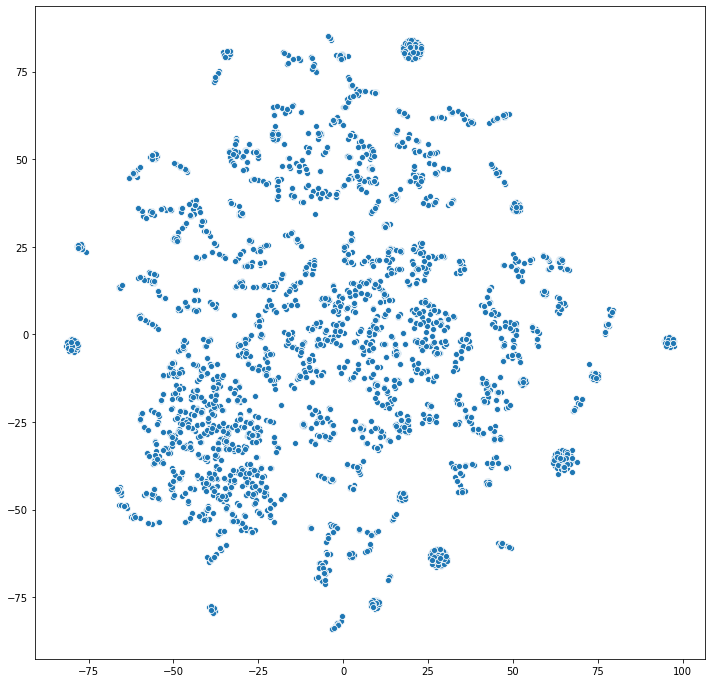

In [19]:
# Unpack and visualize the data from the tsne

tsne_1_x = []
tsne_1_y = []

#I am going to write my unpacking protocol as a function
#this way I can reuse it for additional reps

def tsne_unpack(tsne_array, list1, list2):
    for t in tsne_array:
        list1.append(t[0])
        list2.append(t[1])

tsne_unpack(ws_tsne1, tsne_1_x, tsne_1_y)

#function verified by printing tsne_1_x

#visualize the data using a scatter plot from seaborn
plt.figure(figsize = (12, 12))
sns.scatterplot(x = tsne_1_x, y = tsne_1_y)

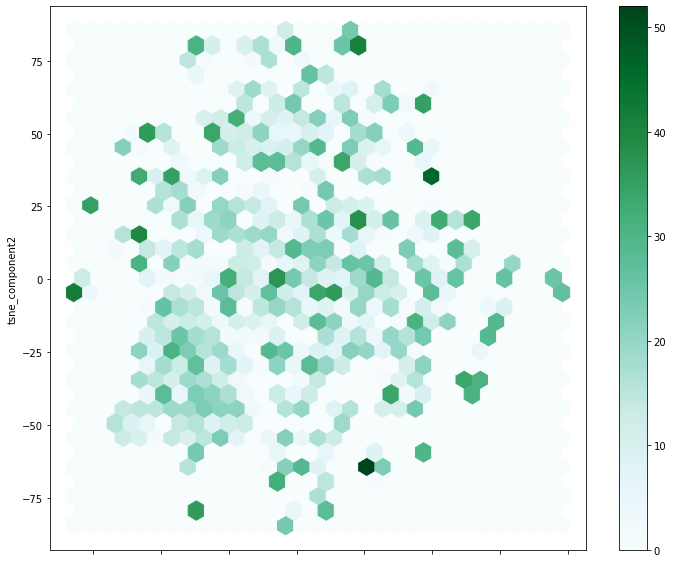

In [20]:
#try to visualize the same thing with a hexbin

tsne_1_dict = {'tsne_component1': tsne_1_x, 'tsne_component2': tsne_1_y}

tsne_vs_df = pd.DataFrame(tsne_1_dict)

tsne_vs_df.plot.hexbin(x = 'tsne_component1', y='tsne_component2', gridsize = 30, figsize = (12, 10))

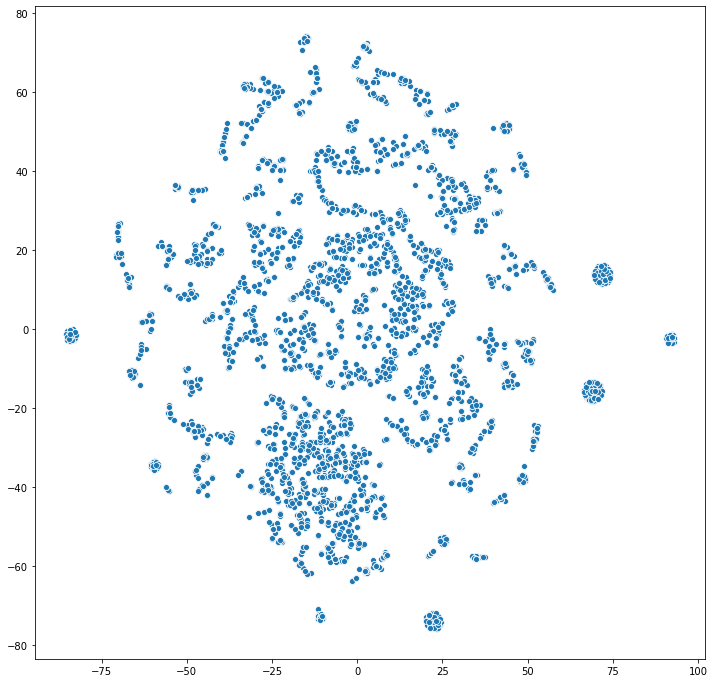

In [21]:
#write a function to aid the optimization run

def visny_tsne(tsne_instantiation):
    
    ws_tsne_iter = tsne_instantiation.fit_transform(ml_scale)
    
    tsne_x = []
    tsne_y = []
    
    tsne_unpack(ws_tsne_iter, tsne_x, tsne_y)
    
    plt.figure(figsize = (12, 12))
    sns.scatterplot(x = tsne_x, y = tsne_y)
    plt.show()
    
tsne2 = TSNE(random_state=42, perplexity = 40)

visny_tsne(tsne2)

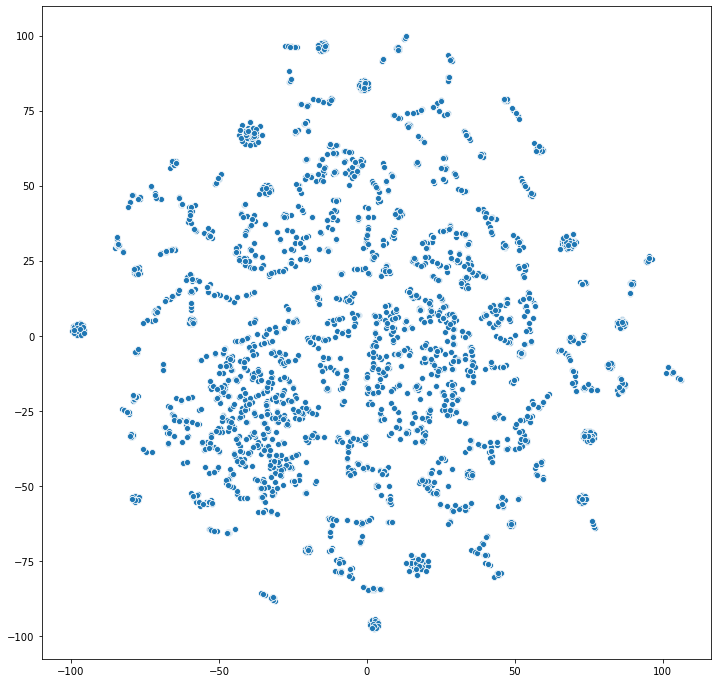

In [22]:
#I can see some clusters, but I'm not satisfied with the separation and want to tune some parameters

tsne3 = TSNE(random_state=42, perplexity = 20)

visny_tsne(tsne3)

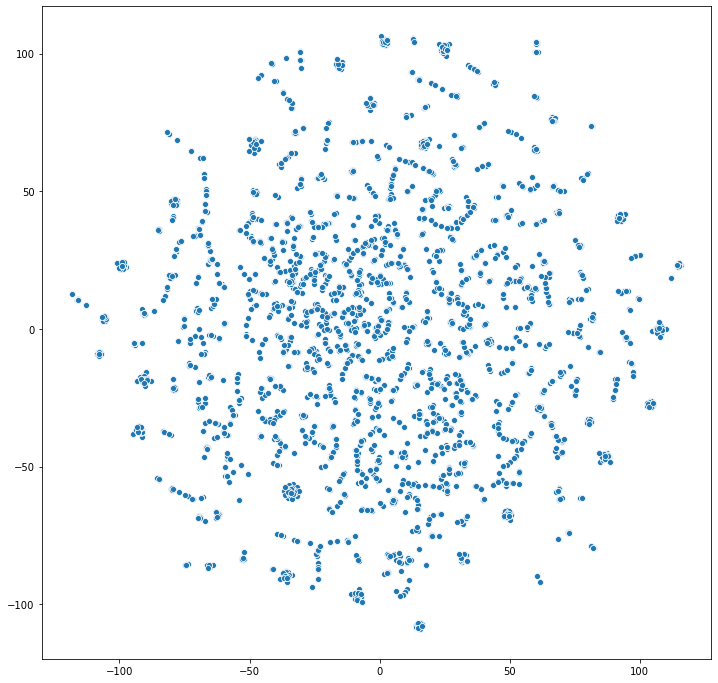

In [23]:
tsne4 = TSNE(random_state=42, perplexity = 10)

visny_tsne(tsne4)

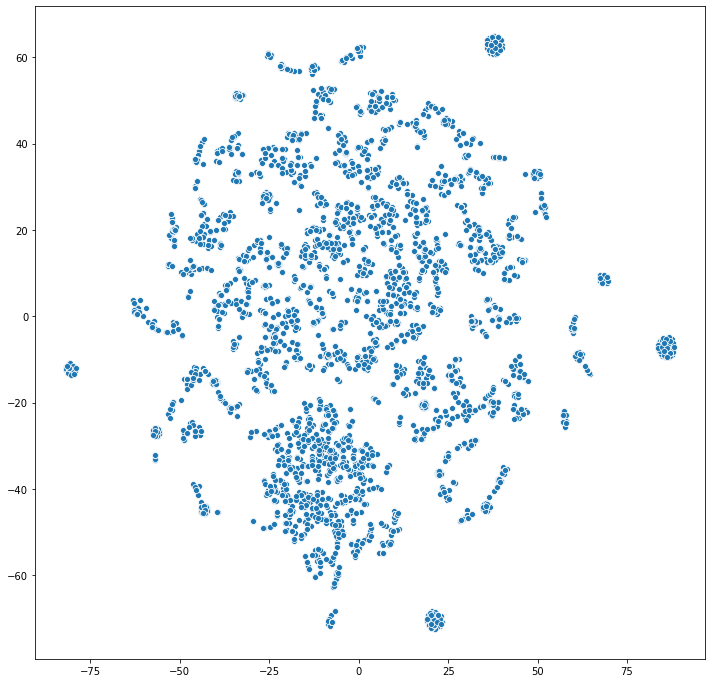

In [24]:
tsne5 = TSNE(random_state=42, perplexity = 50)

visny_tsne(tsne5)

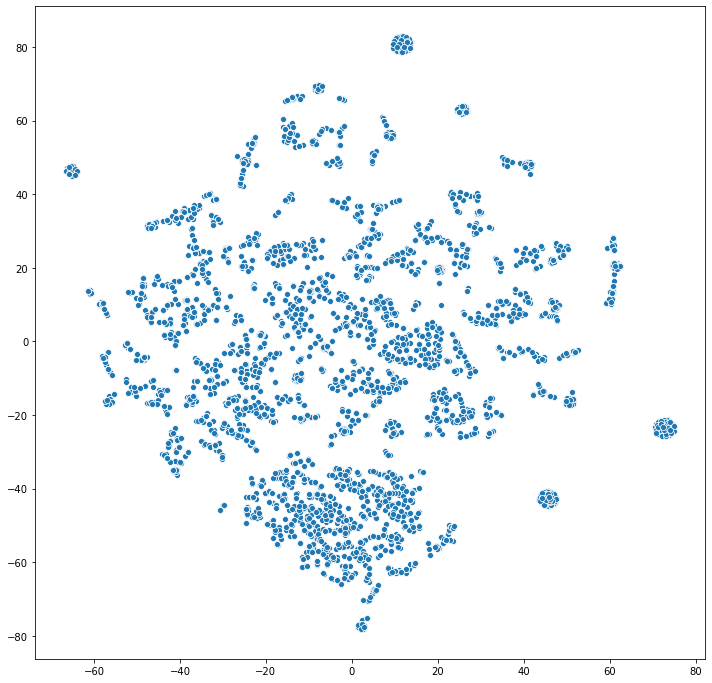

In [25]:
tsne6 = TSNE(random_state=42, perplexity = 50, learning_rate = 300)

visny_tsne(tsne6)

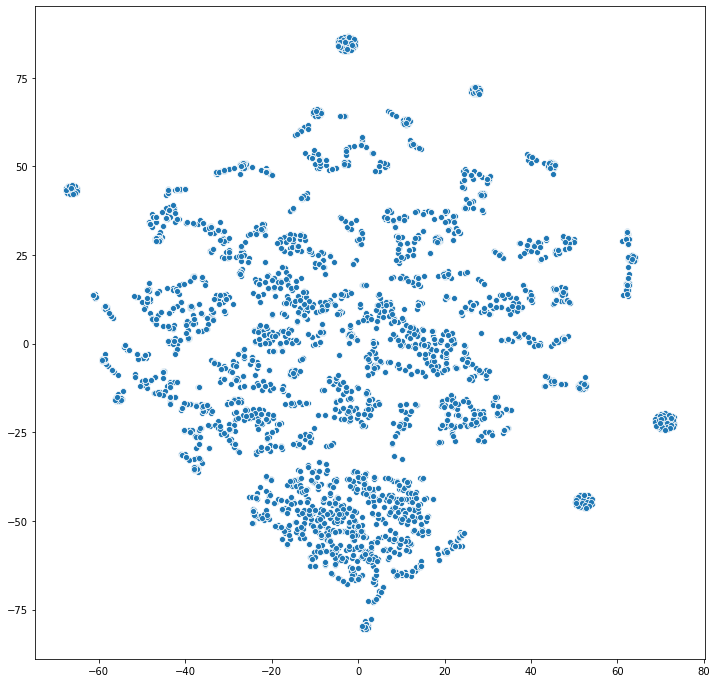

In [26]:
tsne7 = TSNE(random_state=42, perplexity = 50, learning_rate = 600)

visny_tsne(tsne7)

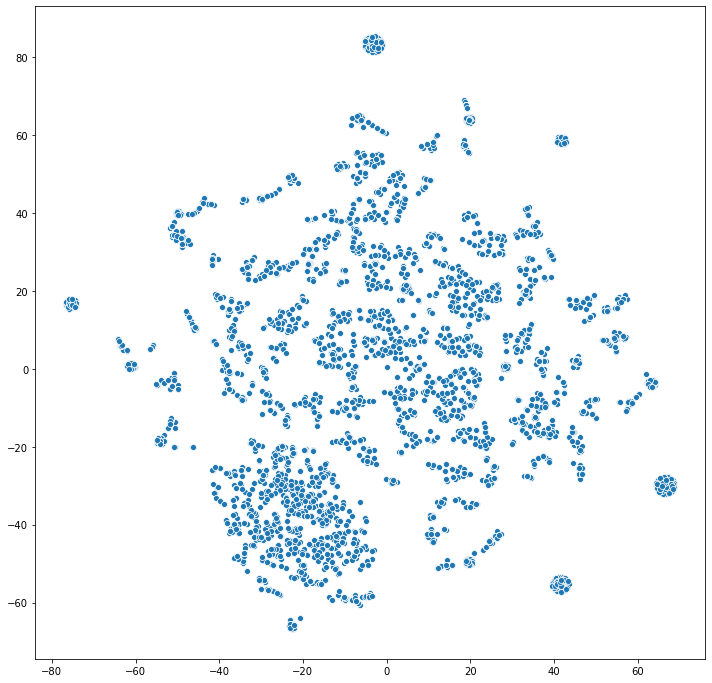

In [27]:
tsne8 = TSNE(random_state=42, perplexity = 50, learning_rate = 450)

visny_tsne(tsne8)

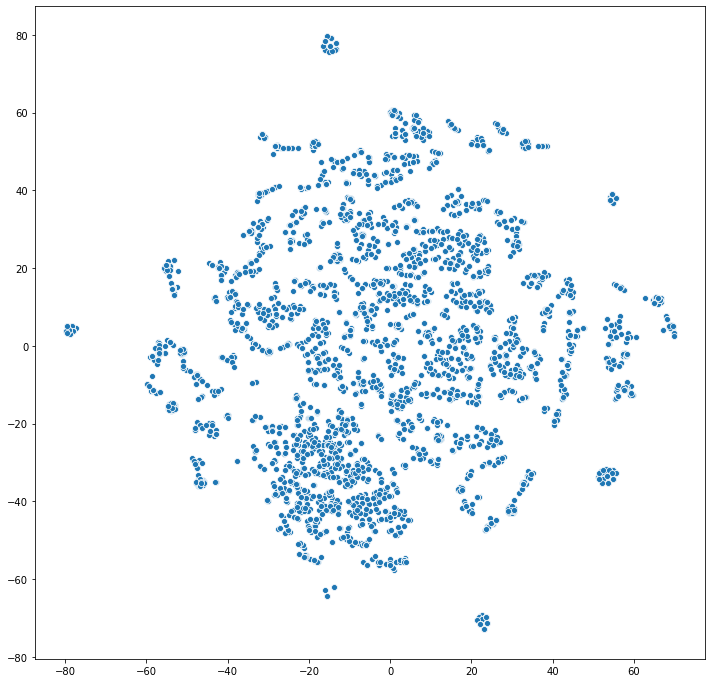

In [28]:
tsne9 = TSNE(random_state=42, perplexity = 50, learning_rate = 100)

visny_tsne(tsne9)

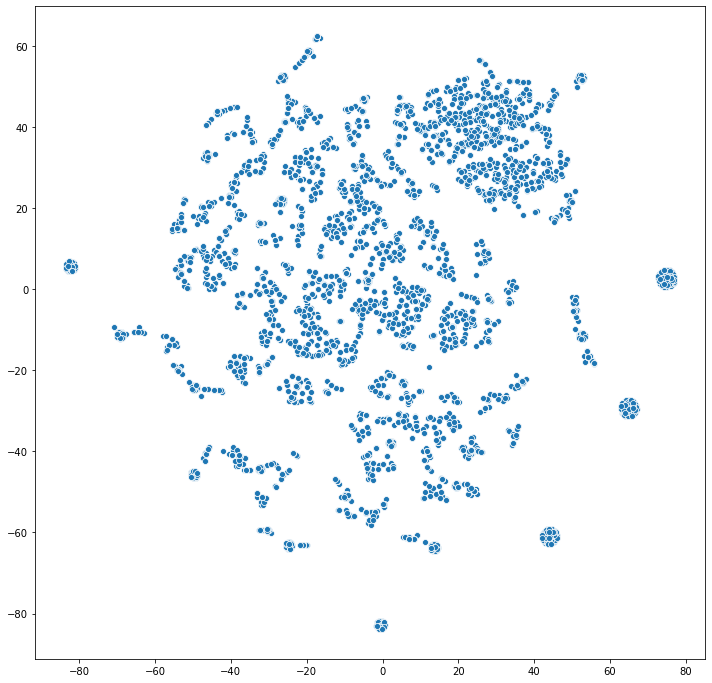

In [29]:
tsne10 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000)

visny_tsne(tsne10)

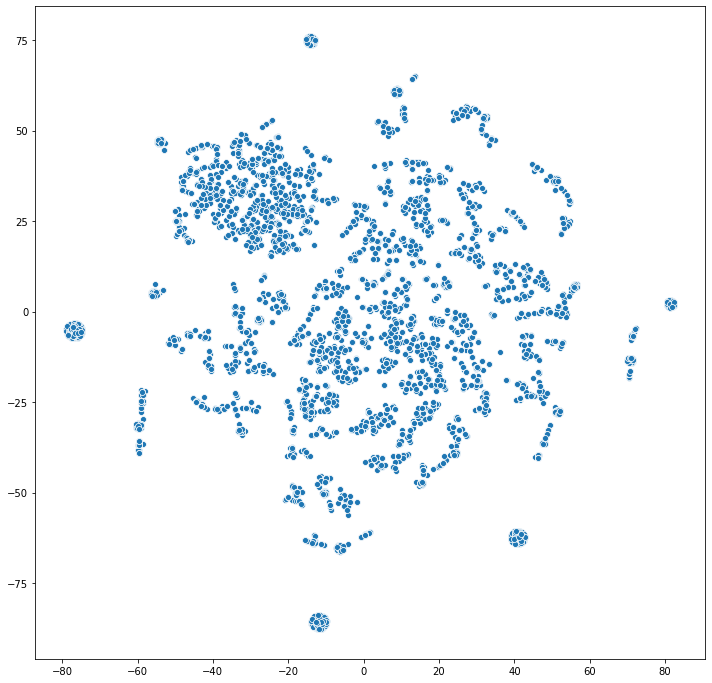

In [30]:
tsne11 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 20)

visny_tsne(tsne11)

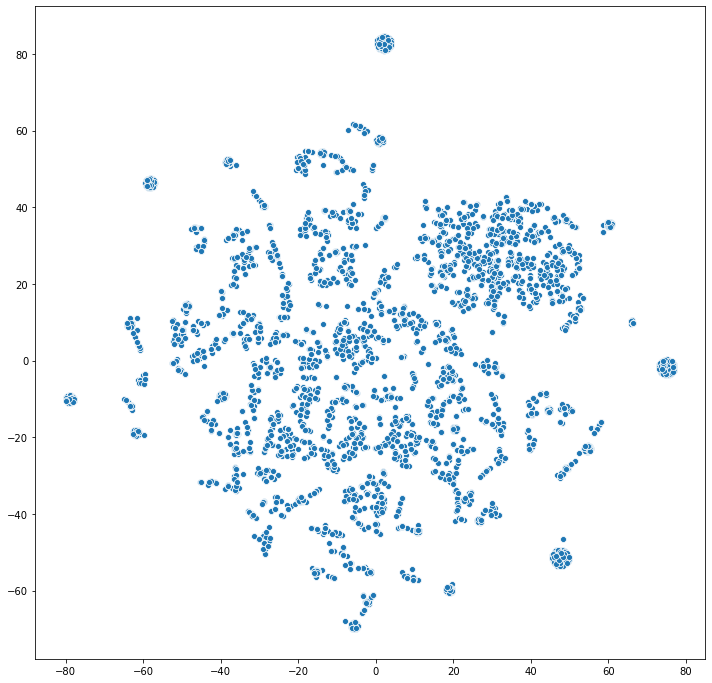

In [31]:
tsne12 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 30)

visny_tsne(tsne12)

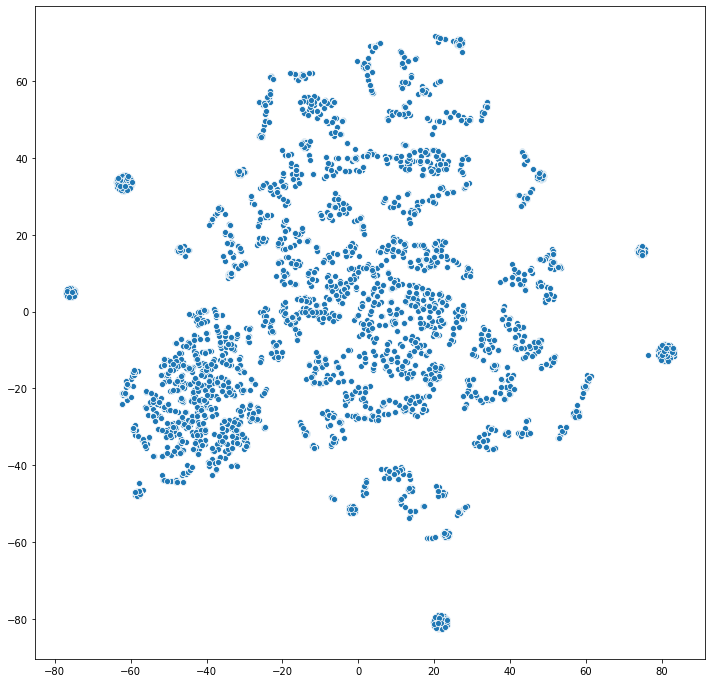

In [32]:
tsne13 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 6)

visny_tsne(tsne13)

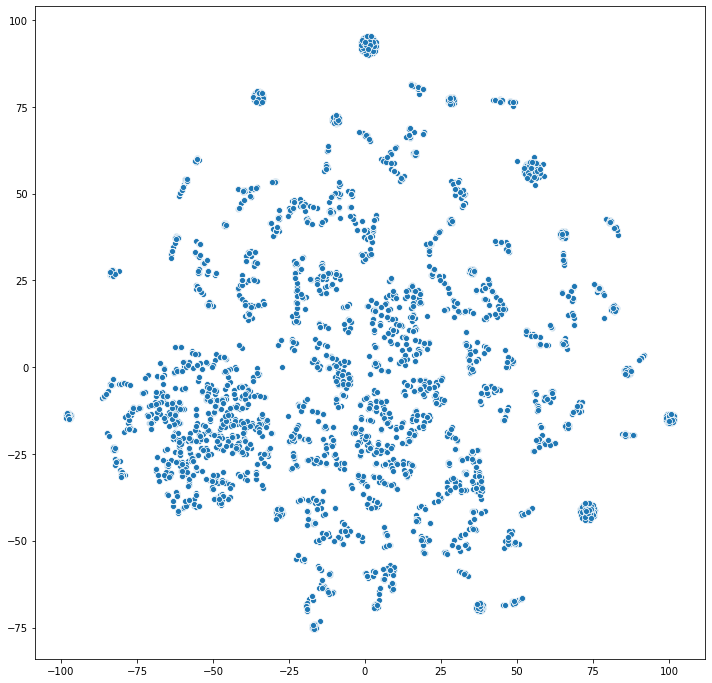

In [33]:
#try lower perplexity with a higher learning rate

tsne14 = TSNE(random_state=42, perplexity = 30, learning_rate = 1000)

visny_tsne(tsne14)

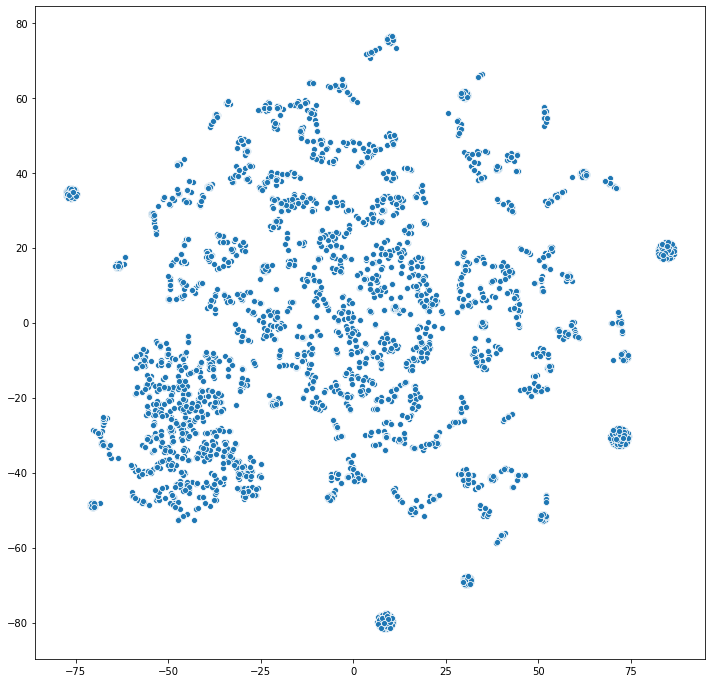

In [34]:
tsne15 = TSNE(random_state=42, perplexity = 40, learning_rate = 1000)

visny_tsne(tsne15)

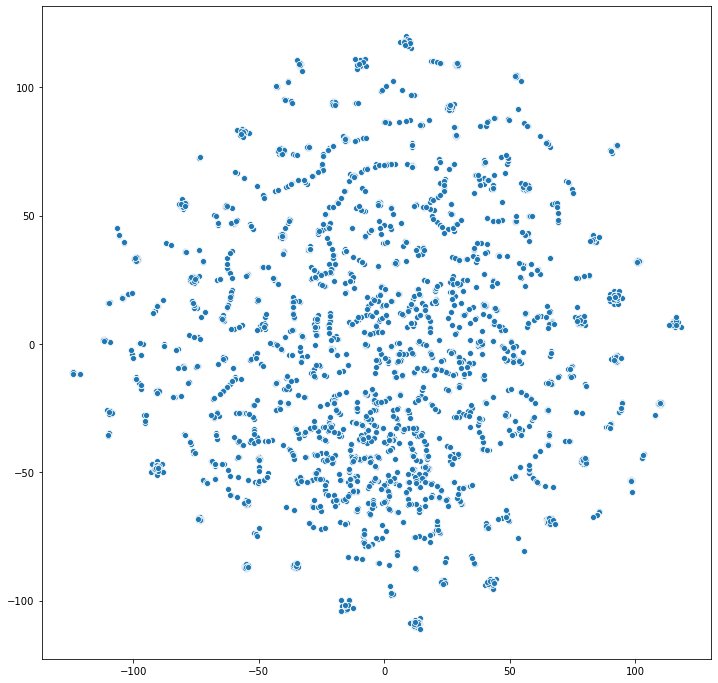

In [35]:
tsne16 = TSNE(random_state=42, perplexity = 10, learning_rate = 1000)

visny_tsne(tsne16)

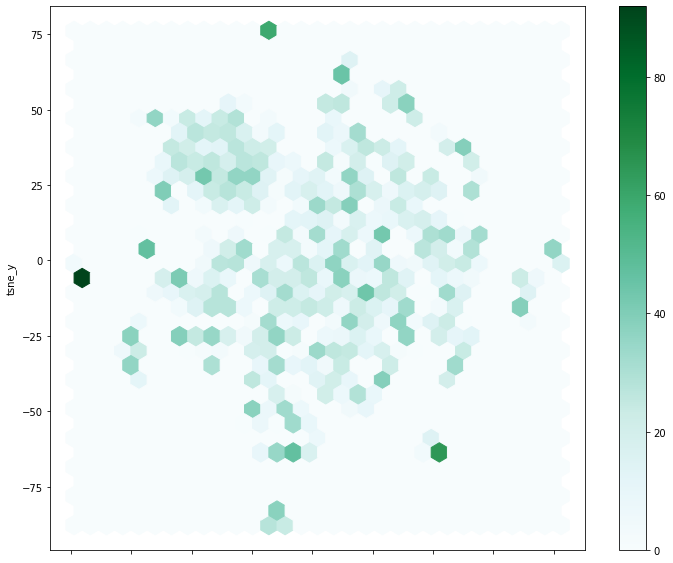

In [36]:
#t-SNE 11 looks like it obtained the best results, although it doesn't look like the data separates that well into clusters
#visualize this tsne using a hexbin plot

ws_tsne_max = tsne11.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

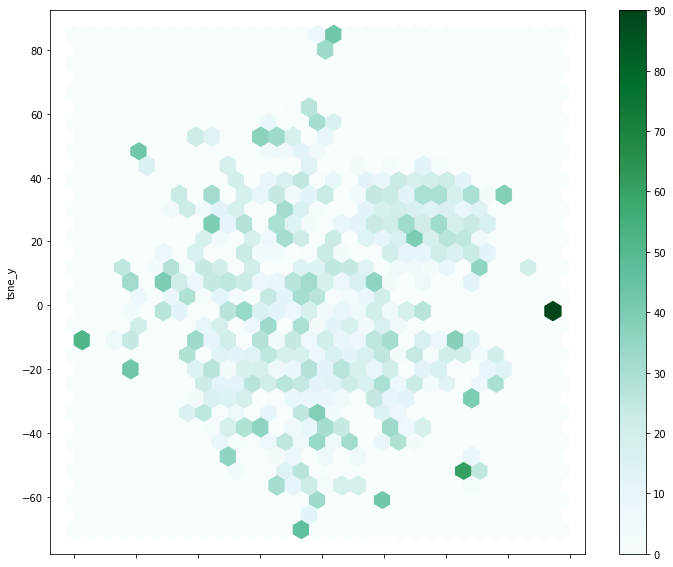

In [37]:
ws_tsne_max = tsne12.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

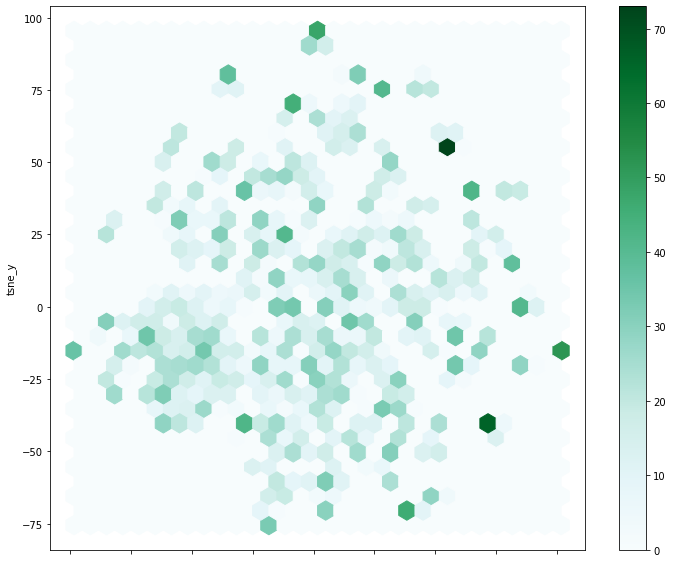

In [38]:
ws_tsne_max = tsne14.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

I think I like the conditions from 14 the best this time. 